# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [3]:
x_train[0].shape

(28, 28)

Check the sample train data

In [4]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [5]:

y_train[333]

8

Check the actual image

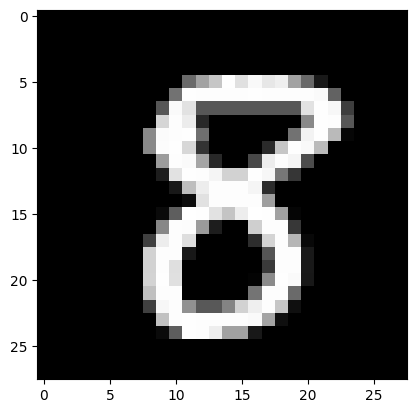

In [6]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [7]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [8]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [9]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

***Default Values***

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [12]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5159 - accuracy: 0.8476 - val_loss: 0.2023 - val_accuracy: 0.9398
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2488 - accuracy: 0.9278 - val_loss: 0.1576 - val_accuracy: 0.9521
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1962 - accuracy: 0.9435 - val_loss: 0.1260 - val_accuracy: 0.9625
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1712 - accuracy: 0.9498 - val_loss: 0.1145 - val_accuracy: 0.9667
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1549 - accuracy: 0.9539 - val_loss: 0.1067 - val_accuracy: 0.9677
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1394 - accuracy: 0.9585 - val_loss: 0.1017 - val_accuracy: 0.9703
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1311 - accuracy: 0.9609 - val_loss: 0.0940 - val_accuracy: 0.9717
Epoch 

Use Keras evaluate function to evaluate performance on the test set

***Scores of Default Values***

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09893839061260223
Test accuracy: 0.9776999950408936


Interpret the result

***We can see here that the initial values of having two hidden layers with the size of 64 produced a model with high accuracy. This also shown very low test loss and it seems reliable***

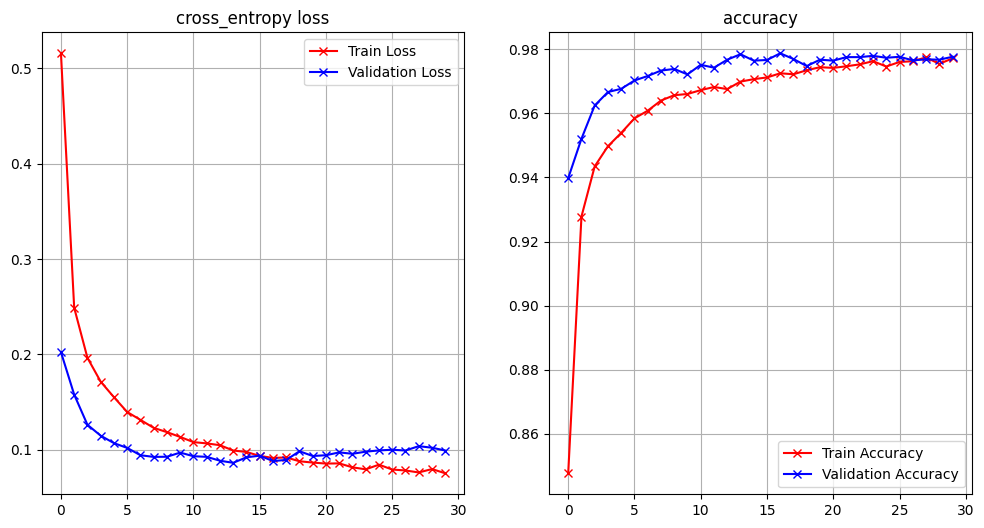

In [14]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

***Instructed Parameter Values***

In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 10s 19ms/step - loss: 0.2573 - accuracy: 0.9203 - val_loss: 0.1174 - val_accuracy: 0.9631
Epoch 2/30
469/469 [==============================] - 9s 20ms/step - loss: 0.1040 - accuracy: 0.9680 - val_loss: 0.0829 - val_accuracy: 0.9734
Epoch 3/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 4/30
469/469 [==============================] - 8s 18ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0774 - val_accuracy: 0.9789
Epoch 5/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0479 - accuracy: 0.9848 - val_loss: 0.0753 - val_accuracy: 0.9800
Epoch 6/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0729 - val_accuracy: 0.9812
Epoch 7/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0705 - val_accuracy: 0.981

Use Keras evaluate function to evaluate performance on the test set

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08881086856126785
Test accuracy: 0.9865999817848206


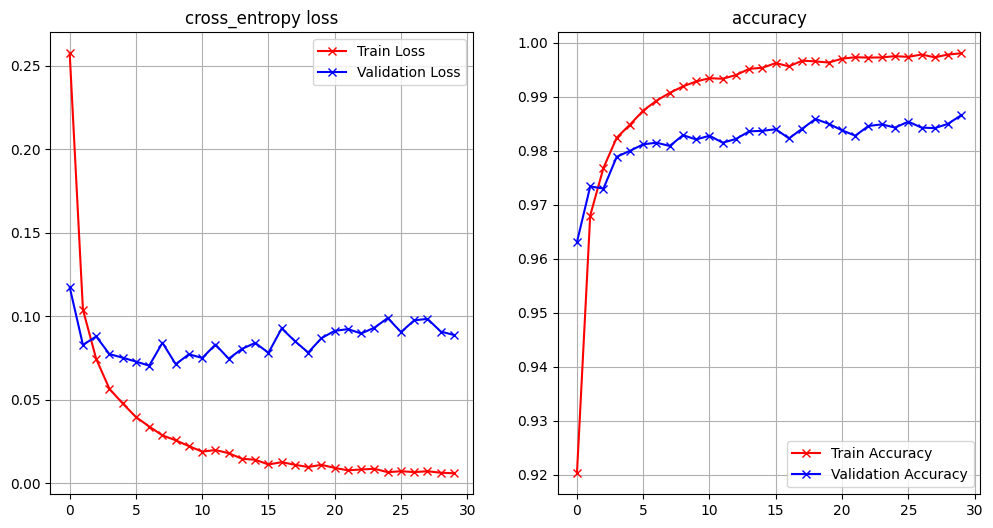

In [19]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

***As we compare the history of performance of two models. We can see that the model with two 512 sizes for their hidden layer had a liitle bit advantage in terms of accuracy. Meanwhile the model with two 64s as the sizes of hidden layers, it had a much more stable validation accuracy than the instructed values. We can also see that its validation accuracy is better than its train accuracy which means the model with two 512 layers may be subjected to overfitting.***

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [20]:
# 1. Two hidden layers.
# 2. First hidden layer of size 400 and second of size 300
# 3. Dropout of .4 at each layer


model_1 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


In [21]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many parameters does your model have?  How does it compare with the previous model?

***The model that had both 512 as the sizes of their two hidden layers had a total parameter of 669706. Meanwhile the model with both 64 as the size of its hidden layers only had 55050. This new model had a total parameter of 437310***

In [22]:
# 5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=.001),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.3321 - accuracy: 0.8980 - val_loss: 0.1301 - val_accuracy: 0.9598
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1532 - accuracy: 0.9534 - val_loss: 0.0982 - val_accuracy: 0.9704
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1208 - accuracy: 0.9641 - val_loss: 0.0824 - val_accuracy: 0.9759
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0993 - accuracy: 0.9702 - val_loss: 0.0748 - val_accuracy: 0.9777
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0872 - accuracy: 0.9741 - val_loss: 0.0714 - val_accuracy: 0.9795
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0804 - accuracy: 0.9767 - val_loss: 0.0703 - val_accuracy: 0.9791
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0732 - val_accuracy: 0.9802

In [23]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08195151388645172
Test accuracy: 0.9829000234603882


In [32]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

# Use at least two regularization techniques and apply it to the new model (model_2)

model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(300, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10, activation='softmax')
])




In [33]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 400)               314000    
                                                                 
 dropout_12 (Dropout)        (None, 400)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 400)               1600      
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 300)               120300    
                                                                 
 dropout_13 (Dropout)        (None, 300)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 300)               1200      
 chNormalization)                                     

In [34]:
# Train this model for your preferred epochs , learning rate, batch size and optimizer

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

batch_size = 128
epochs = 30
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 0.7789 - accuracy: 0.9162 - val_loss: 0.4214 - val_accuracy: 0.9628
Epoch 2/30
469/469 [==============================] - 7s 16ms/step - loss: 0.3724 - accuracy: 0.9561 - val_loss: 0.2777 - val_accuracy: 0.9691
Epoch 3/30
469/469 [==============================] - 7s 16ms/step - loss: 0.2828 - accuracy: 0.9601 - val_loss: 0.2433 - val_accuracy: 0.9650
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2408 - accuracy: 0.9630 - val_loss: 0.2063 - val_accuracy: 0.9724
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2310 - accuracy: 0.9638 - val_loss: 0.2110 - val_accuracy: 0.9679
Epoch 6/30
469/469 [==============================] - 8s 16ms/step - loss: 0.2204 - accuracy: 0.9649 - val_loss: 0.1981 - val_accuracy: 0.9704
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2153 - accuracy: 0.9643 - val_loss: 0.1861 - val_accuracy: 0.9717

In [35]:
score_mod2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_mod2[0])
print('Test accuracy:', score_mod2[1])

Test loss: 0.16245906054973602
Test accuracy: 0.9765999913215637


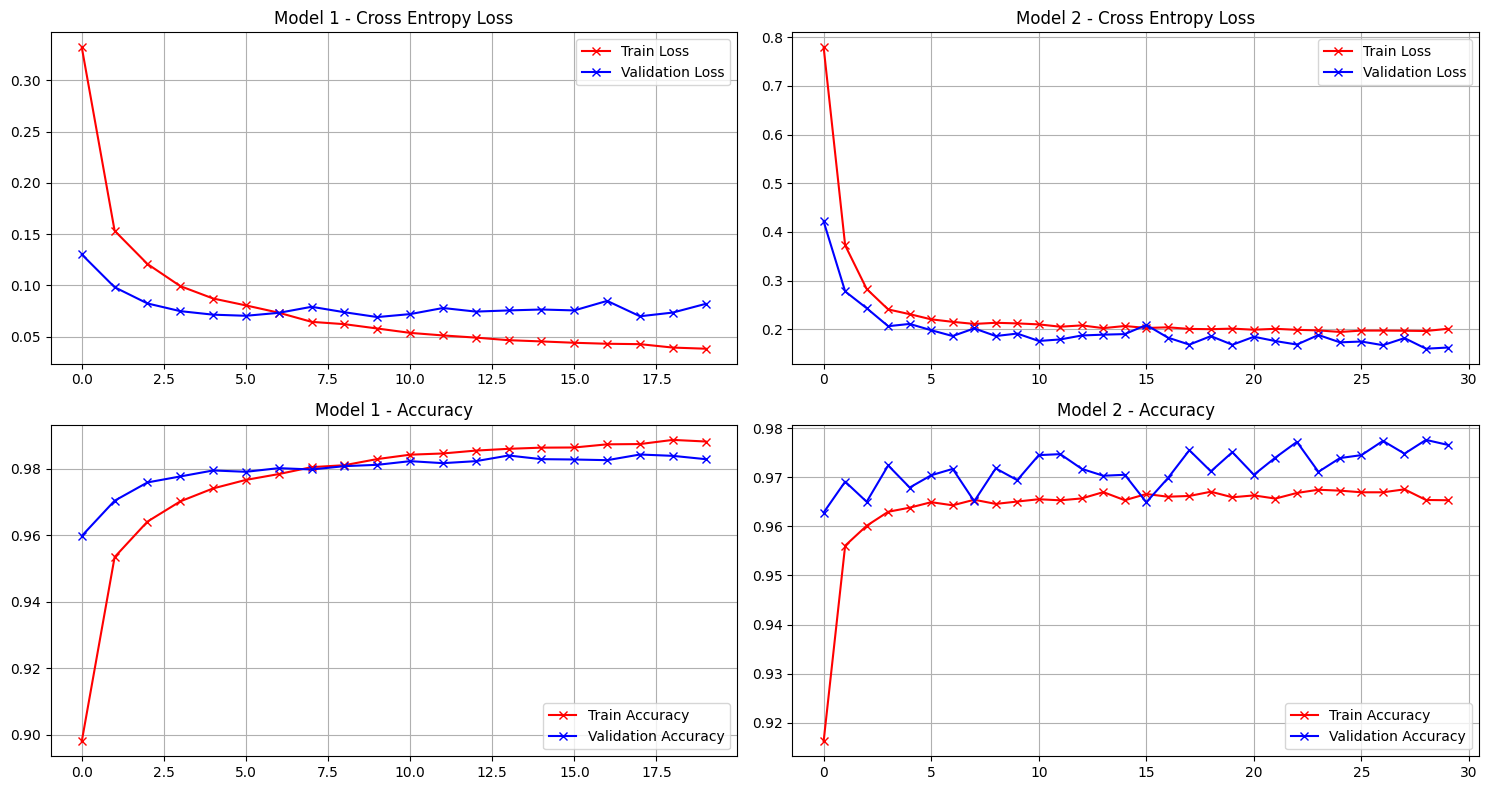

In [37]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(histories, titles):
    fig, axs = plt.subplots(2, len(histories), figsize=(15, 8))

    for i, (history, title) in enumerate(zip(histories, titles)):
        axs[0, i].plot(history.history["loss"], 'r-x', label="Train Loss")
        axs[0, i].plot(history.history["val_loss"], 'b-x', label="Validation Loss")
        axs[0, i].legend()
        axs[0, i].set_title(title + ' - Cross Entropy Loss')
        axs[0, i].grid(True)

        axs[1, i].plot(history.history["accuracy"], 'r-x', label="Train Accuracy")
        axs[1, i].plot(history.history["val_accuracy"], 'b-x', label="Validation Accuracy")
        axs[1, i].legend()
        axs[1, i].set_title(title + ' - Accuracy')
        axs[1, i].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_loss_accuracy([history_1, history_2], ['Model 1', 'Model 2'])


Compare the accuracy and loss (training and validation) of model_1 and model_2



***It seems like model 1 performed a lot better than model 2. I think this is because of excessive regularization techniques that I practiced using. Model 1 also has been less subjective to overfitting***

#### Conclusion

***This activity shown me how to properly do different regularization techniques. This includes droupout, l1 and l2, batchnormalization and other else. This is crucial for the model to perform even with unseen data. This activity also improved my skills in understanding graphs. ***

***Utilizing proper parameters also plays a big role in optimizing your model. Having the right amount of size per neuoron will be helpful to achieve higher accuracy with lower entropy loss. ***